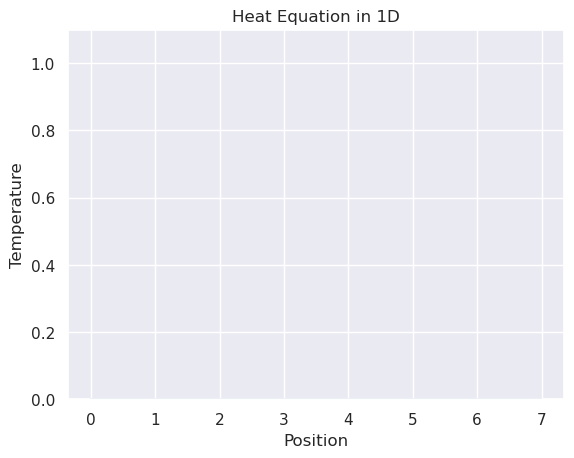

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

from IPython.display import HTML

sns.set_theme()

Nt =  100
Nx = 8

deltaX = 1/(Nx - 1)
deltaT = 1/Nt

# Initial condition
random_vector = np.zeros(Nx)
random_vector[int(Nx/2)] = 1
random_vector[int(Nx/2 + 1)] = 0.99
random_vector[int(Nx/2 - 1)] = 0.99

uj_1 = np.zeros(Nx)
duj_1 = np.zeros(Nx)

# Set up the figure and axis
fig, ax = plt.subplots()
line, = ax.plot(uj_1)
ax.set_ylim(0, 1.1)  # Adjust based on expected temperature range

plt.title('Heat Equation in 1D')
plt.xlabel('Position')
plt.ylabel('Temperature')

# Update function for animation
def update(frame):
    global uj_1, duj_1, uj
    if frame == 0:
        uj_1 = random_vector
    else:
        uj_1 = uj
    for i in range(1, Nx - 1):
        if i == 1:
            duj_1[i] = (deltaT / deltaX**2) * (uj_1[i+1] - 2 * uj_1[i])
        elif i == Nx - 2:
            duj_1[i] = (deltaT / deltaX**2) * (uj_1[i-1] - 2 * uj_1[i])
        else:
            duj_1[i] = (deltaT / deltaX**2) * (uj_1[i+1] - 2 * uj_1[i] + uj_1[i-1])
    
    uj = uj_1 + duj_1
    line.set_ydata(uj)
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=100, blit=True)

# Display animation inline in Jupyter Notebook
HTML(ani.to_jshtml())